   # TP1 : Méthodes de descente de gradient et algorithmes de Newton
   
   ## Menu
   1. [Préambule : définition des fonctions](#preamble)   
       1.1 [Étude la fonction de Rosenbrock](#rosenbrock_fun)  
       1.2 [Étude d'une fonction quadratique](#quad_fun)  
   2. [Gradient à pas fixe et à pas normalisé](#fixed_normalized)  
       2.1 [Implémentation des méthodes](#implem_fn)  
       2.2 [Application à la fonction de Rosenbrock](#rosenbrock_fn)  
       2.3 [Application à une fonction quadratique](#quad_fn)  
   3. [Règle d'Armijo et règle de Wolfe](#armijo_wolfe)  
       3.1 [Implémentation des règles et descentes de gradient associées](#implem_aw)  
       3.2 [Application à la fonction de Rosenbrock](#rosenbrock_aw)  
       3.3 [Application à une fonction quadratique](#quad_aw)  
   4. [Gradient conjugué](#conjugate_gradient)  
       4.1 [Implémentation des méthodes](#implem_cg)  
       4.2 [Application à la fonction de Rosenbrock](#rosenbrock_cg)  
       4.3 [Application à une fonction quadratique](#quad_cg)  
   5. [Problème de Lennard-Jones](#lennard-jones)  
       5.1 [Le potentiel de van der Walls](#vdw)  
       5.2 [Application pour $N=4$ et $N=13$](#appli)
   6. [Méthode Levenberg-Marquardt, Gauss-Newton et régression non-linéaire](#nonlinreg)  
       6.1 [Préambule : régression non-linéaire](#preamble_nonlinreg)  
       6.2 [Implémentation de la méthode de Gauss-Newton et de Levenberg-Marquardt](#implem_lm)  
       6.3 [Complément : test sur le problème de régression linéaire](#linreg)

## Préambule : définition des fonctions
<a id="preamble"></a>

On commence par charger les paquets qui seront utiles au TP,

In [1]:
import numpy as np
import numpy.random as rnd
import scipy
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

On définit ensuite les fonctions de Rosenbrock et quadratiques qui seront utilisées dans tout le TP. On en profite pour définir leur gradient et leur hessienne.

In [2]:
def mk_quad(m,M,ndim=2):
    def quad(x):
       y = np.copy(np.asarray(x))
       scal = np.ones(ndim)
       scal[0] = m
       scal[1] = M
       y *= scal
       return np.sum(y**2)

    def quad_grad(x):
       y = np.asarray(x)
       scal = np.ones(ndim)
       scal[0] = m
       scal[1] = M
       return 2*scal*y

    def quad_hessian(x):       
       scaling = np.ones(ndim)
       scaling[0] = m
       scaling[1] = M
       return 2*np.diag(scaling)

    return quad, quad_grad, quad_hessian

def rosenbrock(x):
    y = np.asarray(x)
    return np.sum((y[0] - 1)**2 + 100*(y[1] - y[0]**2)**2)

def rosenbrock_grad(x):
    y = np.asarray(x)
    grad = np.zeros_like(y)
    grad[0] = 400*y[0]*(y[0]**2-y[1]) + 2*(y[0]-1)
    grad[1] = 200*(y[1]-y[0]**2)
    return grad

def rosenbrock_hessian_(x):
    y = np.asarray(x)
    return np.array((
                    (1 - 4*100*y[1] + 12*100*y[0]**2, -4*y[0]*100),
                    (             -4*100*y[0],    2*100),
                   ))

### Étude de la fonction de Rosenbrock
<a id="rosenbrock_fun"></a>

On étudie la fonction de Rosenbrock. Cette fonction est très souvent utilisée pour tester des algorithmes d'optimisation. En effet, une fois la "vallée" trouvée, il est assez compliqué pour un algorithme de suivre cette "vallée" jusqu'au point $(1,1)$.

/usr/local/lib/python2.7/dist-packages/numpy/ma/core.py:6434: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/usr/local/lib/python2.7/dist-packages/numpy/ma/core.py:6434: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


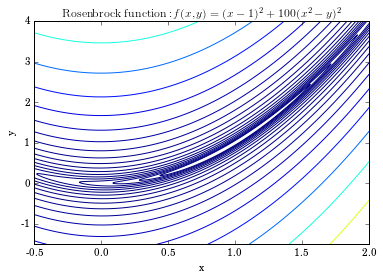

In [3]:
rosenbrock_display = lambda x,y: (1-x)**2+100*(x**2-y)**2

nx = 1000 # number of discretization points along the x-axis
ny = 1000 # number of discretization points along the y-axis
a=-0.5; b=2. # extreme points in the x-axis
c=-1.5; d=4 # extreme points in the y-axis

X,Y = np.meshgrid(np.linspace(a,b,nx), np.linspace(c,d,ny))

Z = rosenbrock_display(X,Y)

CS = plt.contour(X,Y,Z,np.logspace(-0.5,3.5,20,base=10))
plt.title(r'$\mathrm{Rosenbrock \ function: } f(x,y)=(x-1)^2+100(x^2 - y)^2$')
plt.xlabel('x')
plt.ylabel('y')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.show()

### Étude d'une fonction quadratique
<a id="quad_fun"></a>

On présente une étude similaire pour la fonction quadratique en deux dimensions. Pour obtenir un comportement de type "vallée étroite" comme on a pu le voir sur la fonction de Rosenbrock, on doit augmenter le rapport $\frac{M}{m}$.

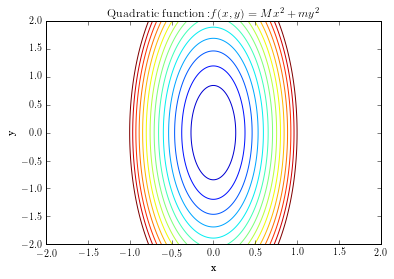

In [4]:
quad_display = lambda x,y,M,m: M*x**2 + m*y**2

M = 10
m = 1

nx = 1000 # number of discretization points along the x-axis
ny = 1000 # number of discretization points along the y-axis
a=-2; b=2. # extreme points in the x-axis
c=-2; d=2 # extreme points in the y-axis

X,Y = np.meshgrid(np.linspace(a,b,nx), np.linspace(c,d,ny))

Z = quad_display(X,Y,M,m)

CS = plt.contour(X,Y,Z,np.linspace(0,10,15))
plt.title(r'$\mathrm{Quadratic \ function: } f(x,y)=Mx^2 + my^2$')
plt.xlabel('x')
plt.ylabel('y')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.show()

## Gradient à pas fixe et gradient à pas normalisé
<a id="fixed_normalized"></a>

### Implémentation des méthodes
<a id="implem_fn"></a>

On définit maintenant la **descente de gradient à pas fixe**.

In [5]:
def steepest_descent_constant_step(f, grad, x0, iterations, error_point, error_grad, h):
    dim = np.max(np.shape(x0))
    x_list = np.zeros([dim,iterations])
    f_list = np.zeros(iterations)
    error_point_list = np.zeros(iterations)
    error_grad_list = np.zeros(iterations)
    x = np.asarray(x0)
    x_old = x
    grad_x = grad(x)
    for i in xrange(iterations):
        x = x - h*grad(x)
        grad_x = grad(x)
        f_x = f(x)
        x_list[:,i] = x
        f_list[i] = f_x
        error_point_list[i] = np.linalg.norm(x - x_old)
        error_grad_list[i] = np.linalg.norm(grad_x)
        
        if i % 1000 == 0:
            print "iter={}, x={}, f(x)={}".format(i+1, x, f(x))

        if (error_point_list[i] < error_point)|(error_grad_list[i] < error_grad):
            break
        x_old = x
        
    print "point error={}, grad error={}, iteration={}, f(x)={}".format(error_point_list[i], error_grad_list[i],i+1,f(x))
    return { 'x_list' : x_list[:,0:i], 'f_list' : f_list[0:i], 'error_point_list' : error_point_list[0:i], 'error_point_list' : error_point_list[0:i]}

### Application à la fonction de Rosenbrock
<a id="rosenbrock_fn"></a>

On fixe les paramètres pour la fonction de Rosenbrock et on applique la **descente de gradient à pas fixe**.

In [6]:
f = rosenbrock
grad = rosenbrock_grad
x0 = np.array([1.1,2.1])
error_point = 10**-10
error_grad = 10**-10
h = 10**-3
iterations = 10000
result = steepest_descent_constant_step(f, grad, x0, iterations, error_point, error_grad, h)

iter=1, x=[1.4914 1.922 ], f(x)=9.37842864941
iter=1001, x=[1.31009675 1.71738666], f(x)=0.0962667367609
iter=2001, x=[1.23735338 1.53186801], f(x)=0.0564046272728
iter=3001, x=[1.17704852 1.38608048], f(x)=0.0313867890036
iter=4001, x=[1.12897884 1.2750709 ], f(x)=0.0166583590471
iter=5001, x=[1.09206034 1.19294434], f(x)=0.00848725511303
iter=6001, x=[1.06462195 1.13366863], f(x)=0.00418218308244
iter=7001, x=[1.04477655 1.09173245], f(x)=0.00200798143601
iter=8001, x=[1.03072615 1.06251709], f(x)=0.000945553095376
iter=9001, x=[1.02093693 1.04239494], f(x)=0.000439039393205
point error=1.25639377581e-05, grad error=0.0125590875554, iteration=10000, f(x)=0.000201992447293


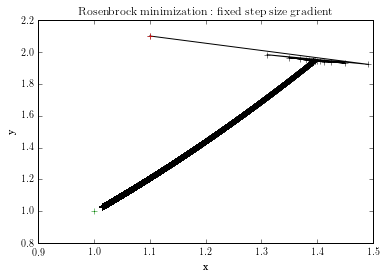

In [7]:
x_list = result['x_list']

all_x_i = np.append(x0[0], x_list[0,:])
all_y_i = np.append(x0[1], x_list[1,:])
plt.plot(all_x_i, all_y_i, 'k+-')
plt.plot(x0[0],x0[1],'r+')
plt.plot([1],[1],'g+')
plt.title(r'$\mathrm{Rosenbrock \ minimization: fixed \ step \ size \ gradient}$')
plt.xlabel('x')
plt.ylabel('y')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.show()

Ce comportement est attendu. En effet, une fois que le **gradient à pas fixe** se retrouve dans la vallée étroite, le gradient est quasiment nul et la descente vers l'argument minimum de la fonction de Rosenbrock est très lente. On reprend maintenant le code de la **descente de gradient à pas fixe** et on introduit la **descente de gradient à pas normalisé**.

In [8]:
def steepest_descent_normalized_step(f, grad, x0, iterations, error_point, error_grad, h):
    dim = np.max(np.shape(x0))
    x_list = np.zeros([dim,iterations])
    f_list = np.zeros(iterations)
    error_point_list = np.zeros(iterations)
    error_grad_list = np.zeros(iterations)
    x = np.asarray(x0)
    x_old = x
    grad_x = grad(x)
    for i in xrange(iterations):
        x = x - h*grad(x)/np.linalg.norm(grad(x))
        grad_x = grad(x)
        f_x = f(x)
        x_list[:,i] = x
        f_list[i] = f_x
        error_point_list[i] = np.linalg.norm(x - x_old)
        error_grad_list[i] = np.linalg.norm(grad_x)
        
        if i % 1000 == 0:
            print "iter={}, x={}, f(x)={}".format(i+1, x, f(x))

        if (error_point_list[i] < error_point)|(error_grad_list[i] < error_grad):
            break
        x_old = x
        
    print "point error={}, grad error={}, iteration={}, f(x)={}".format(error_point_list[i], error_grad_list[i],i+1,f(x))
    return { 'x_list' : x_list[:,0:i], 'f_list' : f_list[0:i], 'error_point_list' : error_point_list[0:i], 'error_point_list' : error_point_list[0:i]}

In [9]:
f = rosenbrock
grad = rosenbrock_grad
x0 = np.array([1.1,2.1])
error_point = 10**-10
error_grad = 10**-10
h = 10**-2
iterations = 10000
result = steepest_descent_normalized_step(f, grad, x0, iterations, error_point, error_grad, h)

iter=1, x=[1.10910287 2.09586022], f(x)=74.9643908515
iter=1001, x=[1.29462443 1.66450539], f(x)=0.100136951453
iter=2001, x=[1.19651261 1.41978492], f(x)=0.0526772261274
iter=3001, x=[1.11567644 1.2331665 ], f(x)=0.0267615603301
iter=4001, x=[1.05923871 1.11068341], f(x)=0.0162855269913
iter=5001, x=[1.02607384 1.04168626], f(x)=0.0130926197506
iter=6001, x=[1.00904919 1.00712309], f(x)=0.0123079910895
iter=7001, x=[1.00101047 0.99100471], f(x)=0.0121390169051
iter=8001, x=[0.99737732 0.98376234], f(x)=0.0121050522513
iter=9001, x=[0.99576915 0.98056504], f(x)=0.0120984454501
point error=0.01, grad error=4.98027958135, iteration=10000, f(x)=0.0127475324613


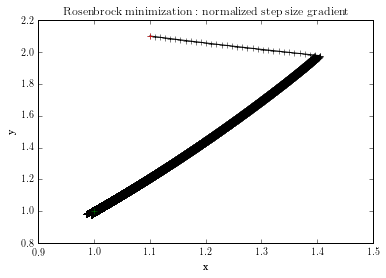

In [10]:
x_list = result['x_list']

all_x_i = np.append(x0[0], x_list[0,:])
all_y_i = np.append(x0[1], x_list[1,:])
plt.plot(all_x_i, all_y_i, 'k+-')
plt.plot(x0[0],x0[1],'r+')
plt.plot([1],[1],'g+')
plt.title(r'$\mathrm{Rosenbrock \ minimization: normalized \ step \ size \ gradient}$')
plt.xlabel('x')
plt.ylabel('y')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.show()

La normalisation permet à l'algorithme de ne pas *exploser* pour des valeurs élevées du pas, la quantité de déplacement est toujours la même. Si cela peut avoir un avantage, on a par contre plus de mal à obtenir des résultats précis. En effet, puisque la quantité de déplacement est toujours la même on ne peut pas approcher le pas à moins de $10^{-2}$. Cette valeur est atteinte dans notre cas (voir $\texttt{point error}$).

### Application à une fonction quadratique
<a id="quad_fn"></a>

On présente maintenant une étude similaire pour la fonctionnelle quadratique introduite en première partie.

iter=1, x=[4.95 4.99 4.99], f(x)=662.3627
iter=1001, x=[2.13697675e-04 6.73971967e-01 6.73971967e-01], f(x)=0.908477566295
iter=2001, x=[9.22559518e-09 9.10297019e-02 9.10297019e-02], f(x)=0.0165728132438
iter=3001, x=[3.98280452e-13 1.22948832e-02 1.22948832e-02], f(x)=0.000302328306347
iter=4001, x=[1.71942639e-17 1.66060253e-03 1.66060253e-03], f(x)=5.51520152157e-06
iter=5001, x=[7.42297823e-22 2.24288488e-04 2.24288488e-04], f(x)=1.00610651351e-07
iter=6001, x=[3.20459230e-26 3.02934175e-05 3.02934175e-05], f(x)=1.83538228399e-09
iter=7001, x=[1.38346247e-30 4.09156596e-06 4.09156596e-06], f(x)=3.34818240726e-11
iter=8001, x=[5.97258005e-35 5.52625403e-07 5.52625403e-07], f(x)=6.10789671999e-13
iter=9001, x=[2.57843731e-39 7.46400861e-08 7.46400861e-08], f(x)=1.11422849189e-14
point error=9.98480452356e-11, grad error=9.96483491451e-08, iteration=9376, f(x)=2.48244837184e-15


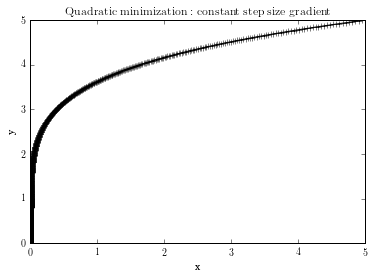

iter=1, x=[4.99903775 4.99980755 4.99980755], f(x)=674.755611608
iter=1001, x=[4.04326159 4.7920787  4.7920787 ], f(x)=454.62714368
iter=2001, x=[3.10602678 4.54591217 4.54591217], f(x)=282.515693734
iter=3001, x=[2.20236669 4.24386992 4.24386992], f(x)=157.281339192
iter=4001, x=[1.36636508 3.85749607 3.85749607], f(x)=76.4343903466
iter=5001, x=[0.67475529 3.34995471 3.34995471], f(x)=33.8267606144
iter=6001, x=[0.23697965 2.71763011 2.71763011], f(x)=16.175010609
iter=7001, x=[0.05421337 2.02369792 2.02369792], f(x)=8.26418378089
iter=8001, x=[0.00633062 1.31757807 1.31757807], f(x)=3.47302585531
iter=9001, x=[1.34356769e-04 6.10492412e-01 6.10492412e-01], f(x)=0.74540242176
point error=0.001, grad error=0.00542788998079, iteration=10000, f(x)=7.36549741088e-06


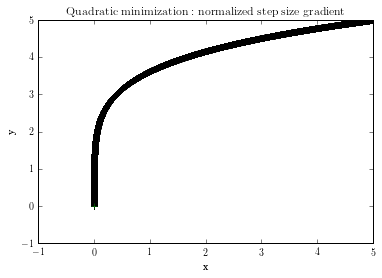

In [11]:
M = 5.
m = 1.
n = 3
(f,grad,hess) = mk_quad(M,m,n)
x0 = np.array([5.,5.,5.])
error_point = 10**-10
error_grad = 10**-10
h = 10**-3
iterations = 10000

result = steepest_descent_constant_step(f, grad, x0, iterations, error_point, error_grad, h)

x_list = result['x_list']

all_x_i = np.append(x0[0], x_list[0,:])
all_y_i = np.append(x0[1], x_list[1,:])
plt.plot(all_x_i, all_y_i, 'k+-')
plt.plot(x0[0],x0[1],'r+')
plt.plot([0],[0],'g+')
plt.title(r'$\mathrm{Quadratic \ minimization: constant \ step \ size \ gradient}$')
plt.xlabel('x')
plt.ylabel('y')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.show()

result = steepest_descent_normalized_step(f, grad, x0, iterations, error_point, error_grad, h)

x_list = result['x_list']

all_x_i = np.append(x0[0], x_list[0,:])
all_y_i = np.append(x0[1], x_list[1,:])
plt.plot(all_x_i, all_y_i, 'k+-')
plt.plot(x0[0],x0[1],'r+')
plt.plot([0],[0],'g+')
plt.title(r'$\mathrm{Quadratic \ minimization: normalized \ step \ size \ gradient}$')
plt.xlabel('x')
plt.ylabel('y')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.show()

## Règle d'Armijo et règle de Wolfe
<a id="armijo_wolfe"></a>

Maintenant, on définit la **règle d'Armijo** et la **règle de Wolfe**. On introduit également les descentes de gradient (*steepest descent gradient* en anglais) associées. On rappelle que les règles d'Armijo et de Wolfe permettent de donner une approximation très grossière de la *recherche linéaire exacte* qui donne lieu à la **descente de gradient à pas optimal**.

On rappelle la **règle d'Armijo**.

Soit $\beta \in ]0,1[$, $c \in ]0, \frac{1}{2}[$ et $L \in \mathbb{R}_+$ la constante de Lipschitz de $J$ restreinte à $K$ un compact.

1. *Proposition* 
$\rho_t = -\frac{\langle \nabla J(x^k),d^k \rangle}{L \|d^k\|^2}$ ,

2. *Test d'acceptation*
  Si $J(x^k + \rho_t d^k) \leq J(x^k) + c\, \rho_t\, \langle \nabla J(x^k),d^k \rangle,
$ alors $\rho^k = \rho_t$ sinon on reprend le test avec $\beta \rho_t$.

On rappelle la **règle de Wolfe**.

Soit $c_1 \in ]0, \frac{1}{2}[$, $c_2 \in ]0,\frac{1}{2}[$, et $L \in \mathbb{R}_+$ la constante de Lipschitz de $J$ restreinte à $K$ un compact. Soit $(m_0,M_0) \in \mathbb{R}_+^2$. On fixe également un nombre maximal d'itérations dans la règle de Wolfe ($10^3$ dans notre cas).

1. *Proposition* 
$\alpha_t = -\frac{\langle \nabla J(x^k),d^k \rangle}{L \|d^k\|^2}$,
 
2. *Test d'acceptation (1)*
  Si $J(x^k + \alpha_t d^k) \leq J(x^k) + m\, \alpha_t\, \langle \nabla J(x^k),d^k \rangle,$ **et** également  ${d^k}^T \nabla J(x^k + \alpha_t d^k) \le -c_2 {d^k}^T \nabla J(x^k)$ alors $\alpha^k = \alpha_t$,
  
3. *Test d'acceptation (2)*
  Si $J(x^k + \alpha_t d^k) > J(x^k) + m\, \alpha_t\, \langle \nabla J(x^k),d^k \rangle,$ alors on pose $\alpha_t = \frac{m_0+M_0}{2}$ ainsi que $M_0 = \alpha_t$ et on reprend le premier test d'acceptation,
  
4. *Test d'acceptation (3)* Si aucune de ces conditions n'est remplie alors on peut poser $\alpha_t = \frac{m_0+M_0}{2}$ et $m_0 = \alpha_t$ et on reprend le premier test d'acceptation.


### Implémentation des règles et descentes de gradient associées
<a id="implem_aw"></a>

In [12]:
def armijo_rule(alpha_0,x,f,f_x,grad_x,d_x,c,beta): #d_x est la direction de descente d_x . grad_x <= 0
    # test f(x_new) \leq f(x_0) + c alpha ps{d_x}{grad_x}
    test = 1
    alpha = alpha_0
    while test: 
        x_new = x+alpha*d_x;
        if (f(x_new)<=f_x+c*alpha*np.dot(grad_x,d_x)):
            test = 0
        else:
            alpha = alpha*beta
    return alpha         

def steepest_descent_armijo(f, grad, x0, iterations, error_point, error_grad, c=0.1,L=100,beta=0.5):
    dim = np.max(np.shape(x0))
    x_list = np.zeros([dim,iterations])  
    f_list = np.zeros(iterations)  
    error_point_list = np.zeros(iterations)
    error_grad_list = np.zeros(iterations)    
    x = x0
    x_old = x
    grad_x = grad(x)
    d_x = -grad_x
    f_x = f(x)
    alpha_0 = -(1./L)*np.dot(d_x,grad_x)/np.power(np.linalg.norm(d_x),2)
    h = armijo_rule(alpha_0,x,f,f_x,grad_x,d_x,c,beta)
    for i in xrange(iterations):
        x = x + h*d_x
        grad_x = grad(x)
        f_x = f(x)
        d_x = -grad_x
        alpha_0 = -(1./L)*np.dot(d_x,grad_x)/np.power(np.linalg.norm(d_x),2)
        h = armijo_rule(alpha_0,x,f,f_x,grad_x,d_x,c,beta)
        x_list[:,i] = x
        f_list[i] = f_x
        error_point_list[i] = np.linalg.norm(x - x_old)
        error_grad_list[i] = np.linalg.norm(grad_x)
        
        if i % 1000 == 0:
            print "iter={}, x={}, f(x)={}".format(i+1, x, f(x))

        if (error_point_list[i] < error_point)|(error_grad_list[i] < error_grad):
            break
        x_old = x
        
    print "point error={}, grad error={}, iteration={}, f(x)={}".format(error_point_list[i], error_grad_list[i],i+1,f(x))
    return { 'x_list' : x_list[:,0:i], 'f_list' : f_list[0:i], 'error_point_list' : error_point_list[0:i], 'error_point_list' : error_point_list[0:i]}    

def wolfe_rule(alpha_0,x,f,grad,f_x,grad_x,d_x,c_1,c_2): #d_x est la direction de descente  d_x . grad_x <= 0
    # test f(x_new) \leq f(x_0) + c_1 alpha ps{d_x}{grad_x} et \ps{x_new}{d_x} \geq c_2 \ps{x_0}{d_x}
    # sinon alpha <- alpha * beta
    # On cherche au fur et mesure un opt dans [minorant, majorant]
    test = 1
    iteration = 0
    alpha = alpha_0
    minorant = 0
    majorant = 1000
    while (test)&(iteration<=1000): 
        x_new = x+alpha*d_x;
        if (f(x_new)<=f_x+c_1*alpha*np.dot(grad_x,d_x))&(np.dot(grad(x_new),d_x) >= c_2*np.dot(grad_x,d_x) ):
            test = 0
        elif (f(x_new)>f_x+c_1*alpha*np.dot(grad_x,d_x)):
            majorant = alpha
            alpha = (majorant + minorant)/2
            iteration = iteration +1
        else:
            minorant = alpha
            alpha = (majorant + minorant)/2
            iteration = iteration +1
    return alpha

def steepest_descent_wolfe(f, grad, x0, iterations, error_point, error_grad, c_1=0.1,c_2=0.9,L=100):
    dim = np.max(np.shape(x0))
    x_list = np.zeros([dim,iterations])  
    f_list = np.zeros(iterations)  
    error_point_list = np.zeros(iterations)
    error_grad_list = np.zeros(iterations)    
    x = x0
    x_old = x
    grad_x = grad(x)
    d_x = -grad_x
    f_x = f(x)
    alpha_0 = -(1./L)*np.dot(d_x,grad_x)/np.power(np.linalg.norm(d_x),2)
    h = wolfe_rule(alpha_0,x,f,grad,f_x,grad_x,d_x,c_1,c_2)
    for i in xrange(iterations):
        x = x + h*d_x
        grad_x = grad(x)
        f_x = f(x)
        d_x = -grad_x
        alpha_0 = -(1./L)*np.dot(d_x,grad_x)/np.power(np.linalg.norm(d_x),2)
        h = wolfe_rule(alpha_0,x,f,grad,f_x,grad_x,d_x,c_1,c_2)
        x_list[:,i] = x
        f_list[i] = f_x
        error_point_list[i] = np.linalg.norm(x - x_old)
        error_grad_list[i] = np.linalg.norm(grad_x)
        
        if i % 1000 == 0:
            print "iter={}, x={}, f(x)={}".format(i+1, x, f(x))

        if (error_point_list[i] < error_point)|(error_grad_list[i] < error_grad):
            break
        x_old = x
        
    print "point error={}, grad error={}, iteration={}, f(x)={}".format(error_point_list[i], error_grad_list[i],i+1,f(x))     
    return { 'x_list' : x_list[:,0:i], 'f_list' : f_list[0:i], 'error_point_list' : error_point_list[0:i], 'error_point_list' : error_point_list[0:i]}        

### Application à la fonction de Rosenbrock
<a id="rosenbrock_aw"></a>

On teste maintenant les deux règles sur le problème de Rosenbrock.

iter=1, x=[1.58925 1.8775 ], f(x)=42.3655571092
iter=1001, x=[1.25129319 1.56627411], f(x)=0.0631773695264
iter=2001, x=[1.15590958 1.33648342], f(x)=0.0243205041155
iter=3001, x=[1.07928745 1.16508366], f(x)=0.00629143963667
iter=4001, x=[1.03354117 1.06829502], f(x)=0.00112577869725
iter=5001, x=[1.01220783 1.0245554 ], f(x)=0.000149039649532
iter=6001, x=[1.0037339  1.00747478], f(x)=1.3946824303e-05
iter=7001, x=[1.00108215 1.00216354], f(x)=1.17142185288e-06
iter=8001, x=[1.00031489 1.00062937], f(x)=9.91808732877e-08
iter=9001, x=[1.00009126 1.00018244], f(x)=8.32972512652e-09
point error=7.66668417642e-08, grad error=2.76036269553e-05, iteration=10000, f(x)=6.99356050707e-10


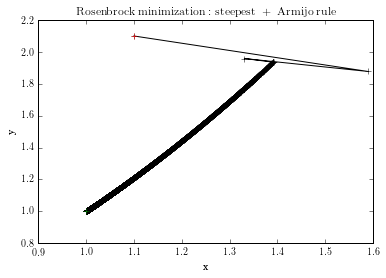

iter=1, x=[1.58925 1.8775 ], f(x)=42.3655571092
iter=1001, x=[0.99051246 0.98110351], f(x)=9.00264106353e-05
iter=2001, x=[0.99746675 0.99493938], f(x)=6.4173784352e-06
iter=3001, x=[0.99927922 0.9985571 ], f(x)=5.19866786342e-07
iter=4001, x=[0.99979202 0.99958486], f(x)=4.33144417421e-08
iter=5001, x=[0.99993993 0.9998797 ], f(x)=3.61110484462e-09
iter=6001, x=[0.99998262 0.99996519], f(x)=3.02286643461e-10
iter=7001, x=[0.99999497 0.99998994], f(x)=2.52763000198e-11
iter=8001, x=[0.99999854 0.99999709], f(x)=2.11887965084e-12
iter=9001, x=[0.99999958 0.99999916], f(x)=1.77403805606e-13
point error=6.41469795516e-10, grad error=2.91161517159e-07, iteration=10000, f(x)=1.49021666552e-14


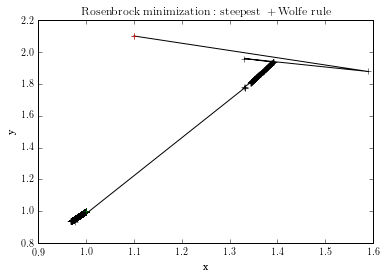

In [13]:
f = rosenbrock
grad = rosenbrock_grad
x0 = np.array([1.1,2.1])
error_point = 10**-10
error_grad = 10**-10
h = 10**-2
iterations = 10000
result = steepest_descent_armijo(f, grad, x0, iterations, error_point, error_grad)

x_list = result['x_list']

all_x_i = np.append(x0[0], x_list[0,:])
all_y_i = np.append(x0[1], x_list[1,:])
plt.plot(all_x_i, all_y_i, 'k+-')
plt.plot(x0[0],x0[1],'r+')
plt.plot([1],[1],'g+')
plt.title(r'$\mathrm{Rosenbrock \ minimization: steepest \ + \ Armijo \ rule}$')
plt.xlabel('x')
plt.ylabel('y')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.show()

f = rosenbrock
grad = rosenbrock_grad
x0 = np.array([1.1,2.1])
error_point = 10**-10
error_grad = 10**-10
h = 10**-2
iterations = 10000
result = steepest_descent_wolfe(f, grad, x0, iterations, error_point, error_grad)

x_list = result['x_list']

all_x_i = np.append(x0[0], x_list[0,:])
all_y_i = np.append(x0[1], x_list[1,:])
plt.plot(all_x_i, all_y_i, 'k+-')
plt.plot(x0[0],x0[1],'r+')
plt.plot([1],[1],'g+')
plt.title(r'$\mathrm{Rosenbrock \ minimization: steepest \ + Wolfe \ rule}$')
plt.xlabel('x')
plt.ylabel('y')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.show()

### Application à une fonction quadratique
<a id="quad_aw"></a>

De la même manière, on teste les deux règles et les algorithmes associés sur la fonction quadratique introduite dans la première partie.

iter=1, x=[4.5 4.9 4.9], f(x)=554.27
iter=1001, x=[7.86542063e-46 8.24654005e-09 8.24654005e-09], f(x)=1.36010845604e-16
point error=9.98416949402e-11, grad error=9.78448610414e-09, iteration=1044, f(x)=2.39340420805e-17


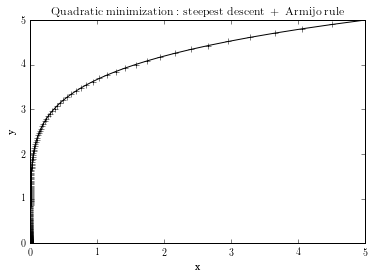

iter=1, x=[-1.60345459  3.67930908  3.67930908], f(x)=91.3512961845
point error=4.95161855578e-11, grad error=1.66272534941e-10, iteration=54, f(x)=6.9116389689e-21


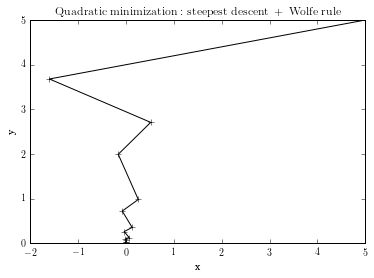

In [14]:
M = 5.
m = 1.
n = 3
(f,grad,hess) = mk_quad(M,m,n)
x0 = np.array([5.,5.,5.])
error_point = 10**-10
error_grad = 10**-10
h = 10**-3
iterations = 10000

result = steepest_descent_armijo(f, grad, x0, iterations, error_point, error_grad)

x_list = result['x_list']

all_x_i = np.append(x0[0], x_list[0,:])
all_y_i = np.append(x0[1], x_list[1,:])
plt.plot(all_x_i, all_y_i, 'k+-')
plt.plot(x0[0],x0[1],'r+')
plt.plot([0],[0],'g+')
plt.title(r'$\mathrm{Quadratic \ minimization: steepest \ descent \ + \ Armijo \ rule}$')
plt.xlabel('x')
plt.ylabel('y')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.show()

result = steepest_descent_wolfe(f, grad, x0, iterations, error_point, error_grad)

x_list = result['x_list']

all_x_i = np.append(x0[0], x_list[0,:])
all_y_i = np.append(x0[1], x_list[1,:])
plt.plot(all_x_i, all_y_i, 'k+-')
plt.plot(x0[0],x0[1],'r+')
plt.plot([0],[0],'g+')
plt.title(r'$\mathrm{Quadratic \ minimization: steepest \ descent \ + \ Wolfe \ rule}$')
plt.xlabel('x')
plt.ylabel('y')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.show()

## Gradient conjugué
<a id="conjugate_gradient"></a>

On rappelle ici l'heuristique du **gradient conjugué**. Si la convergence en temps fini est assurée pour les problèmes quadratiques, ce résultat n'est plus valable sur une fonctionnelle quelconque. On présente ici la version de *Polak-Ribière*

1. *Direction de descente :* $\beta^{k} = \frac{\langle \nabla J(x^k) - \nabla J(x^{k-1}), \nabla J(x^k) \rangle}{\| \nabla J(x^{k-1}) \|^2}$,
2. *Pas de descente :* on applique une règle de \textit{recherche linéaire inexacte} (ici la règle d'Armijo ou la règle de Wolfe) pour trouver le meilleur pas de descente pour la direction de descente $d^k = -\nabla J(x^k) + \beta^k d^{k-1}$,
3. *Itération :* $x^{k+1} = x^k + \alpha^k d^k$.

### Implémentation des méthodes
<a id="implem_cg"></a>

In [15]:
def conjugate_gradient_armijo(f, grad, x0, iterations, error_point, error_grad, c=0.1,L=100,beta=0.5):
    dim = np.max(np.shape(x0))
    x_list = np.zeros([dim,iterations])  
    f_list = np.zeros(iterations)  
    error_point_list = np.zeros(iterations)
    error_grad_list = np.zeros(iterations)    
    x = x0
    x_old = x
    grad_x = grad(x)
    d_x = -grad_x
    f_x = f(x)
    alpha_0 = -(1./L)*np.dot(d_x,grad_x)/np.power(np.linalg.norm(d_x),2)
    h = armijo_rule(alpha_0,x,f,f_x,grad_x,d_x,c,beta)
    for i in xrange(iterations):
        x = x + h*d_x
        grad_x_old = grad_x
        grad_x = grad(x)
        f_x = f(x)
        kappa = np.dot(grad_x - grad_x_old, grad_x)/np.power(np.linalg.norm(grad_x),2)
        d_x = kappa*d_x -grad_x
        alpha_0 = -(1./L)*np.dot(d_x,grad_x)/np.power(np.linalg.norm(d_x),2)
        h = armijo_rule(alpha_0,x,f,f_x,grad_x,d_x,c,beta)
        x_list[:,i] = x
        f_list[i] = f_x
        error_point_list[i] = np.linalg.norm(x - x_old)
        error_grad_list[i] = np.linalg.norm(grad_x)
        
        if i % 1000 == 0:
            print "iter={}, x={}, f(x)={}".format(i+1, x, f(x))

        if (error_point_list[i] < error_point)|(error_grad_list[i] < error_grad):
            break
        x_old = x
        
    print "point error={}, grad error={}, iteration={}, f(x)={}".format(error_point_list[i], error_grad_list[i],i+1,f(x))     
    return { 'x_list' : x_list[:,0:i], 'f_list' : f_list[0:i], 'error_point_list' : error_point_list[0:i], 'error_point_list' : error_point_list[0:i]}        

def conjugate_gradient_wolfe(f, grad, x0, iterations, error_point, error_grad, c_1=0.1,c_2=0.9,L=100):
    dim = np.max(np.shape(x0))
    x_list = np.zeros([dim,iterations])  
    f_list = np.zeros(iterations)  
    error_point_list = np.zeros(iterations)
    error_grad_list = np.zeros(iterations)       
    x = x0
    x_old = x
    grad_x = grad(x)
    d_x = -grad_x
    f_x = f(x)
    alpha_0 = -(1./L)*np.dot(d_x,grad_x)/np.power(np.linalg.norm(d_x),2)
    h = wolfe_rule(alpha_0,x,f,grad,f_x,grad_x,d_x,c_1,c_2)
    for i in xrange(iterations):
        x = x + h*d_x
        grad_x_old = grad_x
        grad_x = grad(x)
        f_x = f(x)
        kappa = np.dot(grad_x - grad_x_old, grad_x)/np.power(np.linalg.norm(grad_x),2)
        d_x = kappa*d_x -grad_x
        alpha_0 = -(1./L)*np.dot(d_x,grad_x)/np.power(np.linalg.norm(d_x),2)
        h = wolfe_rule(alpha_0,x,f,grad,f_x,grad_x,d_x,c_1,c_2)
        x_list[:,i] = x
        f_list[i] = f_x
        error_point_list[i] = np.linalg.norm(x - x_old)
        error_grad_list[i] = np.linalg.norm(grad_x)
        
        if i % 1000 == 0:
            print "iter={}, x={}, f(x)={}".format(i+1, x, f(x))

        if (error_point_list[i] < error_point)|(error_grad_list[i] < error_grad):
            break
        x_old = x
        
    print "point error={}, grad error={}, iteration={}, f(x)={}".format(error_point_list[i], error_grad_list[i],i+1,f(x))     
    return { 'x_list' : x_list[:,0:i], 'f_list' : f_list[0:i], 'error_point_list' : error_point_list[0:i], 'error_point_list' : error_point_list[0:i]}                

### Application à la fonction de Rosenbrock
<a id="rosenbrock_cg"></a>

On teste maintenant les méthodes de **gradient conjugué** avec les deux règles introduites sur la fonction de Rosenbrock.

iter=1, x=[1.58925 1.8775 ], f(x)=42.3655571092
iter=1001, x=[1.12938724 1.27664478], f(x)=0.0168685781005
iter=2001, x=[1.02276496 1.04619777], f(x)=0.00052048153433
iter=3001, x=[1.00281327 1.0056609 ], f(x)=7.98442746312e-06
iter=4001, x=[1.00029252 1.00058662], f(x)=8.57915635338e-08
iter=5001, x=[1.0000362  1.00007238], f(x)=1.31078605355e-09
point error=5.15674926687e-12, grad error=1.41679267015e-05, iteration=5513, f(x)=1.68443504256e-10


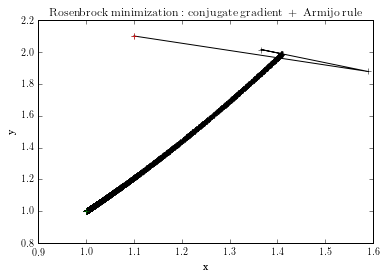

iter=1, x=[1.58925 1.8775 ], f(x)=42.3655571092
point error=1.16162838881e-11, grad error=1.39055242813e-06, iteration=250, f(x)=2.34595229919e-12


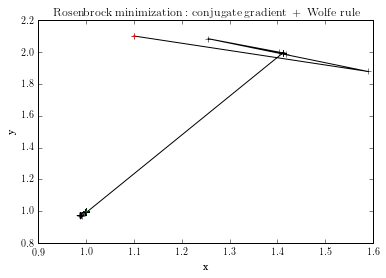

In [16]:
f = rosenbrock
grad = rosenbrock_grad
x0 = np.array([1.1,2.1])
error_point = 10**-10
error_grad = 10**-10
iterations = 10000
result = conjugate_gradient_armijo(f, grad, x0, iterations, error_point, error_grad)

x_list = result['x_list']

all_x_i = np.append(x0[0], x_list[0,:])
all_y_i = np.append(x0[1], x_list[1,:])
plt.plot(all_x_i, all_y_i, 'k+-')
plt.plot(x0[0],x0[1],'r+')
plt.plot([1],[1],'g+')
plt.title(r'$\mathrm{Rosenbrock \ minimization: conjugate \ gradient \ + \ Armijo \ rule}$')
plt.xlabel('x')
plt.ylabel('y')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.show()

f = rosenbrock
grad = rosenbrock_grad
x0 = np.array([1.1,2.1])
error_point = 10**-10
error_grad = 10**-10
iterations = 10000
result = conjugate_gradient_wolfe(f, grad, x0, iterations, error_point, error_grad)

x_list = result['x_list']

all_x_i = np.append(x0[0], x_list[0,:])
all_y_i = np.append(x0[1], x_list[1,:])
plt.plot(all_x_i, all_y_i, 'k+-')
plt.plot(x0[0],x0[1],'r+')
plt.plot([1],[1],'g+')
plt.title(r'$\mathrm{Rosenbrock \ minimization: conjugate \ gradient \ + \ Wolfe \ rule}$')
plt.xlabel('x')
plt.ylabel('y')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.show()

### Application à une fonction quadratique
<a id="quad_cg"></a>

Encore une fois, on teste nos algorithmes sur la fonction quadratique introduite précédemment.

iter=1, x=[4.5 4.9 4.9], f(x)=554.27
iter=1001, x=[9.62737766e-46 8.23016467e-09 8.23016467e-09], f(x)=1.35471221154e-16
point error=9.96434366132e-11, grad error=9.7650567881e-09, iteration=1044, f(x)=2.38390835187e-17


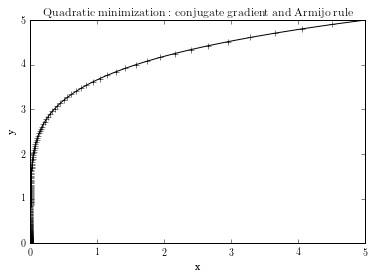

iter=1, x=[-1.60345459  3.67930908  3.67930908], f(x)=91.3512961845
point error=2.03809855111e-15, grad error=7.19553023436, iteration=6, f(x)=12.9439138384


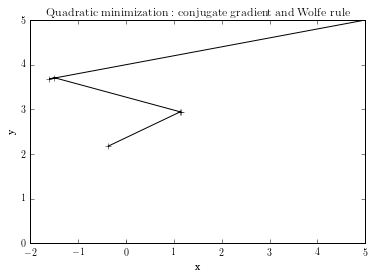

In [17]:
M = 5.
m = 1.
n = 3
(f,grad,hess) = mk_quad(M,m,n)
x0 = np.array([5.,5.,5.])
error_point = 10**-10
error_grad = 10**-10
iterations = 10000

result = conjugate_gradient_armijo(f, grad, x0, iterations, error_point, error_grad)

x_list = result['x_list']

all_x_i = np.append(x0[0], x_list[0,:])
all_y_i = np.append(x0[1], x_list[1,:])
plt.plot(all_x_i, all_y_i, 'k+-')
plt.plot(x0[0],x0[1],'r+')
plt.plot([0],[0],'g+')
plt.title(r'$\mathrm{Quadratic \ minimization: conjugate \ gradient \ and \ Armijo \ rule}$')
plt.xlabel('x')
plt.ylabel('y')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.show()

result = conjugate_gradient_wolfe(f, grad, x0, iterations, error_point, error_grad)

x_list = result['x_list']

all_x_i = np.append(x0[0], x_list[0,:])
all_y_i = np.append(x0[1], x_list[1,:])
plt.plot(all_x_i, all_y_i, 'k+-')
plt.plot(x0[0],x0[1],'r+')
plt.plot([0],[0],'g+')
plt.title(r'$\mathrm{Quadratic \ minimization: conjugate \ gradient \ and \ Wolfe \ rule}$')
plt.xlabel('x')
plt.ylabel('y')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.show()

**ATTENTION** : ici on n'a pas mis à jour les paramètres des différentes règles. Il convient tout de même d'avoir une idée de l'ordre de grandeur de la constante de Lipschitz $L$ si on veut espérer pouvoir converger (ce qui n'est pas le cas dans le cadre du gradient conjugué avec **règle de Wolfe**). En modifiant $M$ (par exemple $M = 100$) on obtient une bonne estimation de la constante de Lipschitz avec les paramètres par défaut de l'algorithme. Dans ce cas, les deux algorithmes convergent.

## Problème de Lennard-Jones 
<a id="lennard-jones"></a>

On s'intéresse ici au problème de Lennard-Jones qui donne la configuration d'énergie minimal de certains molécules en utilisant le potentiel de van der Walls pour modéliser les intéractions éléctrostatiques. Ici l'idée est simplement de visualiser les différentes méthodes de descente de gradient. Les fonctions étudiées étant non-convexes on n'a pas d'assurance de convergence. Néanmoins, on peut comparer les performances des différents algorithmes.

### Le potentiel de van der Walls
<a id = 'vdw'></a>

On commence par donner les fonctions dont on aura besoin pour implémenter nos méthodes de gradient.

In [18]:
def V(x):
    return x ** -12 - 2 * x ** - 6


def V2(x):
    return x ** -6 - 2 * x ** - 3


def V2der(x):
    return -6 * x ** -7 + 6 * x ** -4


def J(u):
    N = len(u) / 3
    u_v = np.reshape(u, (N, 3))

    M = np.zeros([N, N, 3])
    M -= u_v
    M = M - np.transpose(M, (1, 0, 2))

    M = np.sum(M ** 2, 2)
    np.fill_diagonal(M, 1)
    M = V2(M)
    np.fill_diagonal(M, 0)

    return .5 * np.sum(M)

def grad_J(u):
    N = len(u) / 3
    u_v = np.reshape(u, (N, 3))

    M = np.zeros([N, N, 3])
    M -= u_v
    M = M - np.transpose(M, (1, 0, 2))

    Mnorm = np.sum(M ** 2, 2)
    np.fill_diagonal(Mnorm, 1)
    Mnorm = V2der(Mnorm)
    np.fill_diagonal(Mnorm, 0)

    grad = np.reshape(Mnorm, (N**2, 1)) * np.reshape(M, (N ** 2, 3))
    grad = np.reshape(grad, (N, N, 3))
    grad = np.sum(grad, 1)
    return 2 * np.ravel(grad)

On va maintenant visualiser le **potentiel de van der Walls** pour mettre en évidence ses variations

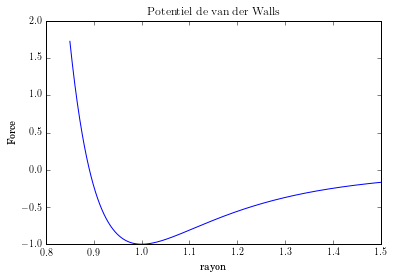

In [19]:
r = np.linspace(0.85,1.5,1000)

Vr = V(r)
plt.plot(r,Vr)
plt.xlabel('rayon')
plt.ylabel('Force')
plt.title(r'$\mathrm{Potentiel \ de \ van \ der \ Walls}$')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.show()

### Application pour $N=4$ et $N=13$
<a id = "appli"></a>

iter=1, x=[-0.05772798 -0.05595635  0.31217113  0.2555843   0.23451845  0.84085113
  0.27440742  0.26598774  0.15933369  0.80784465  0.56736161  0.13989001], f(x)=5924.11598906
point error=0.0, grad error=1.58693463265e-07, iteration=187, f(x)=-6.0


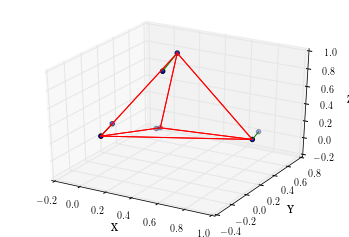

939903.5198938368
-6.000000000000001


In [20]:
N = 4
error_point = 10 ** -10
error_grad = 10 ** -10
x0 = rnd.random(3*N)
x0[0:2] = 0
iterations = 10000

result = steepest_descent_armijo(J, grad_J, x0, iterations, error_point, error_grad)

init_pos = np.reshape(x0, (N,3))
final_pos = np.reshape(result['x_list'][:,-1], (N,3))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(init_pos[:,0], init_pos[:,1], init_pos[:,2], '^')
ax.scatter(final_pos[:,0], final_pos[:,1], final_pos[:,2], '^')
for i in range(4):
    ax.plot([init_pos[i,0], final_pos[i,0]],[init_pos[i,1], final_pos[i,1]],[init_pos[i,2], final_pos[i,2]], 'g')
    for j in range(4):
        ax.plot([final_pos[i,0], final_pos[j,0]], [final_pos[i,1], final_pos[j,1]], [final_pos[i,2], final_pos[j,2]], 'r')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

print(J(np.ravel(init_pos)))
print(J(np.ravel(final_pos)))

On tente aussi pour le cas où $N = 13$. Dans ce cas, la configuration minimale est un **icosaèdre** avec son centre de gravité. 

iter=1, x=[-1.76841636e-08 -1.26339424e-08  8.92263762e-01  1.74203585e-01
  1.24317708e-01  9.30250269e-01  9.66071505e-01  7.51010874e-01
  8.00677996e-01  8.88892590e-01  7.22350838e-01  9.70828283e-01
  9.34283259e-01  4.61070511e-01  1.29097076e-01  2.61729673e-01
  6.55378173e-01  7.34774199e-01  1.91744874e-01  3.01618561e-01
  8.43877005e-01  7.66203681e-01  1.55033372e-01  4.28582863e-02
  5.99990455e-01  8.63465419e-01  7.54634109e-01  5.50358230e-01
  4.22284734e-01  2.24744976e-01  5.15342706e-01  5.96250655e-01
  3.52126843e-02  8.84951449e-01  7.36368964e-01  3.82550420e-01
  8.27092329e-01  7.77572581e-01  8.76535336e-01], f(x)=69539158530.6
point error=3.40328343664e-12, grad error=2.78556989393e-06, iteration=684, f(x)=-41.4719798478


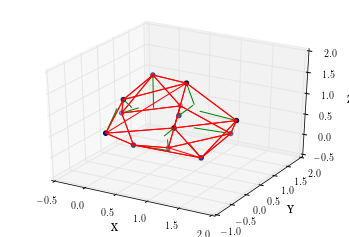

35739721158347.195
-41.47197984781085


In [21]:
N = 13
error_point = 10 ** -10
error_grad = 10 ** -10
x0 = rnd.random(3*N)
x0[0:2] = 0
iterations = 100000

result = steepest_descent_armijo(J, grad_J, x0, iterations, error_point, error_grad)

init_pos = np.reshape(x0, (N,3))
final_pos = np.reshape(result['x_list'][:,-1], (N,3))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(final_pos[:,0], final_pos[:,1], final_pos[:,2], '^')
for i in range(13):
    ax.plot([init_pos[i,0], final_pos[i,0]],[init_pos[i,1], final_pos[i,1]],[init_pos[i,2], final_pos[i,2]], 'g')
moy = np.mean(final_pos,0)
d = np.linalg.norm(final_pos - moy,axis = 1)
center = np.argmin(d)
vertices = final_pos[np.arange(len(final_pos))!=center,:]
vertdiff = np.zeros([N-1, N-1, 3])
vertdiff -= vertices
vertdiff = vertdiff - np.transpose(vertdiff, (1, 0, 2))
vertnorm = np.sum(vertdiff ** 2, 2)
for i in range(12):
    indsort = np.argsort(vertnorm[:,i])
    for j in range(5):
        js = indsort[j]
        ax.plot([vertices[i,0], vertices[js,0]],[vertices[i,1], vertices[js,1]],[vertices[i,2], vertices[js,2]], 'r')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

print J(np.ravel(init_pos))
print J(np.ravel(final_pos))

**ATTENTION** : comme tout à l'heure le problème est non-convexe et donc on peut être coincé dans des minimums locaux. Il peut être nécessaire de relancer plusieurs fois l'algorithme avec des initialisations différentes pour obtenir un icosaèdre. La valeur minimale est environ $-44.32$.

## Méthode de Levenberg-Marquardt, Gauss-Newton et application à la régression non-linéaire

<a id="nonlinreg"></a>

Cette partie du TP est fortement inspirée de l'application proposée dans le <a href=http://scipy-cookbook.readthedocs.io/items/robust_regression.html>Scipy Cookbook</a>.

## Préambule : régression non-linéaire
<a id="preamble_nonlinreg"></a>

Dans cette première partie, on définit les fonctions qui vont nous être utiles pour tester une méthode du second order, la **méthode de Gauss-Newton** et une méthode de quasi-Newton, la **méthode de Levenberg-Marquardt**. On commence par introduire les fonctions et générer des données. 

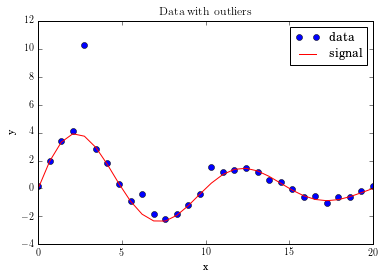

In [22]:
def mk_wave(A, sigma, omega):

    def wave_fun(x):
        return A * np.exp(-sigma * x) * np.sin(omega * x)

    def wave_grad(x):
        dim = np.max(np.shape(x))
        grad = np.zeros([3, dim])
        grad[0, :] = np.sin(omega * x)
        grad[1, :] = -A * x * np.sin(omega * x)
        grad[2, :] = A * x * np.cos(omega * x)
        grad = np.exp(-sigma * x) * grad
        return grad

    def wave_hessian(x):
        dim = np.max(np.shape(x))
        s = np.sin(omega * x)  * x * np.exp(-sigma * x)
        c = np.cos(omega * x) * x * np.exp(-sigma * x)
        scal = A * x ** 2 * np.exp(-sigma * x)
        hessian = np.zeros([3, 3, dim])
        hessian[0, 1, :] = -x* s
        hessian[1, 0, :] = -x * s
        hessian[0, 2, :] = hessian[2, 0, :] = x * c
        hessian[1, 1, :] = scal * s
        hessian[2, 2, :] = -scal * s
        hessian[1, 2, :] = hessian[2, 1, :] = -scal * c
        return hessian
    return wave_fun, wave_grad, wave_hessian

def generate_data(x, A, sigma, omega, noise=0, n_outliers=0, random_state=0):
    y = A * np.exp(-sigma * x) * np.sin(omega * x)
    rnd = np.random.RandomState(random_state)
    error = noise * rnd.randn(x.size)
    outliers = rnd.randint(0, x.size, n_outliers)
    error[outliers] *= 35
    return y + error

A = 5
sigma = 0.1
omega = 0.1 * 2 * np.pi
param_true = np.array([A, sigma, omega])

wave_fun, wave_grad, wave_hessian = mk_wave(A,sigma,omega)

noise = 0.1

x_min = 0
x_max = 20

x_train = np.linspace(x_min, x_max, 30)
y_train = generate_data(x_train, A, sigma, omega, noise=noise, n_outliers=5)

plt.plot(x_train, y_train, 'o', label = 'data')
plt.plot(x_train, wave_fun(x_train), 'r-', label = 'signal')
plt.title(r'$\mathrm{Data \ with \ outliers}$')
plt.xlabel('x')
plt.ylabel('y')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.legend()
plt.show()

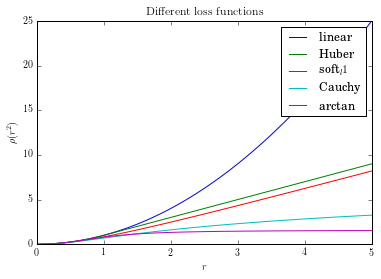

In [23]:
r = np.linspace(0, 5, 100)

linear = r**2
huber = r**2
huber[huber > 1] = 2 * r[huber > 1] - 1
soft_l1 = 2 * (np.sqrt(1 + r**2) - 1)
cauchy = np.log1p(r**2)
arctan = np.arctan(r**2)

plt.plot(r, linear, label='linear')
plt.plot(r, huber, label='Huber')
plt.plot(r, soft_l1, label='soft_l1')
plt.plot(r, cauchy, label='Cauchy')
plt.plot(r, arctan, label='arctan')
plt.xlabel("$r$")
plt.ylabel(r"$\rho(r^2)$")
plt.title(r'$\mathrm{Different \ loss \ functions}$')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.legend()
plt.show()

On en profite pour définir les gradients et hessiennes qui nous seront utiles pour mettre en place la **méthode de Newton** et la **méthode de Levenberg-Marquardt**. On se concentre sur la fonction *de coût* quadratique.

In [24]:
def mk_nonlinreg(x_train, y_train):
    def nonlinreg_fun(param):
        wave_fun = mk_wave(param[0], param[1], param[2])[0]
        return np.sum((wave_fun(x_train) - y_train) ** 2)

    def nonlinreg_grad(param):
        wave_fun, wave_grad = mk_wave(param[0], param[1], param[2])[:2]
        grad = 2 * wave_grad(x_train) * (wave_fun(x_train) - y_train)
        return np.sum(grad, 1)

    def nonlinreg_hessian(param, method='newton', mu=0.1):
        wave_fun, wave_grad, wave_hessian = mk_wave(
            param[0], param[1], param[2])
        grad = wave_grad(x_train)
        if method == 'newton':
            hess1 = 2 * wave_hessian(x_train) * (wave_fun(x_train) - y_train)
            hess1 = np.sum(hess1, 2)
        elif method == 'lm':
            hess1 = mu * np.identity(3)
        hess2 = 2 * np.dot(grad, grad.T)
        return hess1 + hess2

    return nonlinreg_fun, nonlinreg_grad, nonlinreg_hessian

### Implémentation de la méthode de Gauss-Newton et de Levenberg-Marquardt
<a id="implem_lm"></a>

On introduit maintenant la **méthode de Newton** et la méthode de **Levenberg-Marquardt**. Il s'agit simplement de modifier la direction de descente pour prendre en compte une information sur l'évolution de la direction de descente (codée par la Hessienne). Un bon moyen de comprendre pourquoi l'introduction de la hessienne est d'introduire les régularisations quadratiques suivantes :
1. $f_1(x) = f(x^k) + \nabla f(x^k)(x-x^k) + \frac{1}{2 \alpha}\|x-x^k\|^2$  
2. $f_2(x) = f(x^k) + \nabla f(x^k)(x-x^k) + \frac{1}{2}(x-x^k)^T H(x^k) (x-x^k)$  
La minimisation de la première fonctionnelle donne la méthode de **descente de gradient à pas fixe** tandis que la seconde donne la **méthode de Newton**. Néanmoins on a besoin du fait que $H(x^k)$ soit une forme quadratique *positive*, ce qui est acquis si la fonction $f$ est convexe.

In [25]:
def newton_descent(f, grad, hessian, x0, iterations, error_point, error_grad, h, method  = 'newton', mu = 1):
    dim = np.max(np.shape(x0))
    x_list = np.zeros([dim,iterations])
    f_list = np.zeros(iterations)
    error_point_list = np.zeros(iterations)
    error_grad_list = np.zeros(iterations)
    x = np.asarray(x0)
    x_old = x
    grad_x = grad(x)

    count = 0
    for i in xrange(iterations):
        M = hessian(x,method,mu)
        if any(v<0 for v in np.linalg.eig(M)[0]):
            count += 1
        descent = np.linalg.solve(M, grad(x))
        x = x - h*descent
        grad_x = grad(x)
        f_x = f(x)
        x_list[:,i] = x
        f_list[i] = f_x
        error_point_list[i] = np.linalg.norm(x - x_old)
        error_grad_list[i] = np.linalg.norm(grad_x)
        
        if i % 1000 == 0:
            print "iter={}, x={}, f(x)={}".format(i+1, x, f(x))

        if (error_point_list[i] < error_point)|(error_grad_list[i] < error_grad):
            break
        x_old = x
        
    print "point error={}, grad error={}".format(error_point_list[i], error_grad_list[i])
    print "number of negative eigenvalues={}".format(count)
    
    return { 'x_list' : x_list[:,0:i], 'f_list' : f_list[0:i], 'error_point_list' : error_point_list[0:i], 'error_point_list' : error_point_list[0:i]}

Dans notre application on compare les algorithmes de Newton ou quasi-Newton aux algorithmes de descente de gradient introduits plutôt. 

true cond = 10.1249103297, lm cond = 224.311376197
iter=1, x=[0.23083275 0.0726933  0.12116422], f(x)=174.580870344
iter=1001, x=[ 0.18980256 -0.08279293  0.21705181], f(x)=173.687339514
iter=2001, x=[ 0.23882217 -0.07931106  0.21752492], f(x)=173.981304199
iter=3001, x=[ 0.29787212 -0.07565706  0.21783536], f(x)=174.623664809
iter=4001, x=[ 0.36640617 -0.07190515  0.21801956], f(x)=175.671219544
iter=5001, x=[ 0.44405258 -0.06807961  0.21810268], f(x)=177.145280102
iter=6001, x=[ 0.53023936 -0.06418976  0.21809966], f(x)=179.025540105
iter=7001, x=[ 0.62413367 -0.06023817  0.2180185 ], f(x)=181.247970619
iter=8001, x=[ 0.7246421  -0.05622373  0.21786232], f(x)=183.708027811
iter=9001, x=[ 0.83043369 -0.05214292  0.21763044], f(x)=186.268871301
point error=0.000110937427195, grad error=850.377879053
number of negative eigenvalues=10000
iter=1, x=[0.24072142 0.07632997 0.11978865], f(x)=174.537498817
iter=1001, x=[4.84095325 0.16649838 0.60883578], f(x)=62.6164423136
iter=2001, x=[6.550

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in multiply
  
/usr/local/lib/python2.7/dist-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


iter=1001, x=[4.23106986 0.0758629  0.63092949], f(x)=52.8039063697
iter=2001, x=[5.80108607 0.10763307 0.62789267], f(x)=41.9680861285
iter=3001, x=[6.70300059 0.1255709  0.62601236], f(x)=39.211120581
iter=4001, x=[7.24266324 0.13630463 0.62461581], f(x)=38.51376063
iter=5001, x=[7.48430328 0.14115376 0.62389301], f(x)=38.403249007
iter=6001, x=[7.56487522 0.14283733 0.62369218], f(x)=38.3921991405
iter=7001, x=[7.58743507 0.14330898 0.62363461], f(x)=38.3913428802
iter=8001, x=[7.59374922 0.14344124 0.62361861], f(x)=38.3912769033
iter=9001, x=[7.59546688 0.14347721 0.62361423], f(x)=38.3912720619
point error=1.28454691829e-07, grad error=0.000333989832789, iteration=10000, f(x)=38.3912717168
Newton parameters = [ 0.93975255 -0.04799889  0.21731958], Levenberg-Marquardt parameters = [7.5956571  0.14349098 0.62361065], Wolfe parameters = [7.59592472 0.14348669 0.62361296]


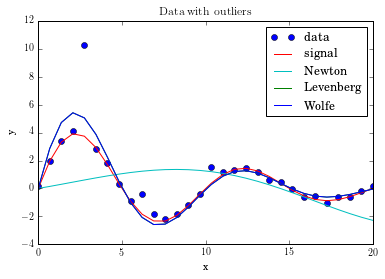

In [26]:
f, grad, hess = mk_nonlinreg(x_train, y_train)

x0 = rnd.random(3)
true_hessian = hess(x0)
lm_hessian = hess(x0, 'lm', 0.1)
print "true cond = {}, lm cond = {}".format(np.linalg.cond(true_hessian), np.linalg.cond(lm_hessian))

error_point = 10 ** -10
error_grad = 10 ** -10
h = 10 ** -3
iterations = 10000

result_newton = newton_descent(f, grad, hess, x0, iterations, error_point, error_grad, h)
result_lm = newton_descent(f, grad, hess, x0, iterations, error_point, error_grad, h, method = 'lm', mu = 10 ** -1)
result_wolfe = steepest_descent_wolfe(f, grad, x0, iterations, error_point, error_grad)

(param_newton, param_lm, param_wolfe) = (result['x_list'][:,-1] for result in (result_newton, result_lm, result_wolfe))
print "Newton parameters = {}, Levenberg-Marquardt parameters = {}, Wolfe parameters = {}".format(param_newton, param_lm, param_wolfe)
newton_wave_fun = mk_wave(param_newton[0], param_newton[1], param_newton[2])[0]
lm_wave_fun = mk_wave(param_lm[0], param_lm[1], param_lm[2])[0]
wolfe_wave_fun = mk_wave(param_wolfe[0], param_wolfe[1], param_wolfe[2])[0]

plt.plot(x_train, y_train, 'o', label = 'data')
plt.plot(x_train, wave_fun(x_train), 'r-', label = 'signal')
plt.plot(x_train, newton_wave_fun(x_train), 'c-', label = 'Newton')
plt.plot(x_train, lm_wave_fun(x_train), 'g-', label = 'Levenberg')
plt.plot(x_train, wolfe_wave_fun(x_train), 'b-', label = 'Wolfe')
plt.title(r'$\mathrm{Data \ with \ outliers}$')
plt.xlabel('x')
plt.ylabel('y')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.legend()
plt.show()

On constate que la méthode de Newton échoue. En effet, la forme quadratique mise en jeu n'est pas *positive*.

### Complément : test sur le problème de régression linéaire
<a id="linreg"></a>

En complément, on montre que la méthode de Gauss-Newton converge bien dans le cas où la fonction que l'on cherche à interpoler est convexe en les paramètres. C'est le cas de la fonction linéaire $f: \ x \mapsto ax+b$ où les paramètres sont $a$ et $b$. On reprend la même étude que précédemment.

In [27]:
def mk_lin(a, b):

    def lin_fun(x):
        return a * x + b

    def lin_grad(x):
        grad = np.ones([2, x.size])
        grad[0,:] = x
        return grad

    def lin_hessian(x, method = 'newton', mu = 0.1):
        return np.zeros([2,2,x.size])
    return lin_fun, lin_grad, lin_hessian

def mk_linreg(x_train, y_train):
    def linreg_fun(param):
        lin_fun = mk_lin(param[0], param[1])[0]
        return np.sum((lin_fun(x_train) - y_train) ** 2)

    def linreg_grad(param):
        lin_fun, lin_grad = mk_lin(param[0], param[1])[:2]
        grad = 2 * lin_grad(x_train) * (lin_fun(x_train) - y_train)
        return np.sum(grad, 1)

    def linreg_hessian(param, method='newton', mu=0.1):
        lin_fun, lin_grad, lin_hessian = mk_lin(
            param[0], param[1])
        grad = lin_grad(x_train)
        if method == 'newton':
            hess1 = 2 * lin_hessian(x_train) * (lin_fun(x_train) - y_train)
            hess1 = np.sum(hess1, 2)
        elif method == 'lm':
            hess1 = mu * np.identity(2)
        hess2 = 2 * np.dot(grad, grad.T)
        return hess1 + hess2

    return linreg_fun, linreg_grad, linreg_hessian

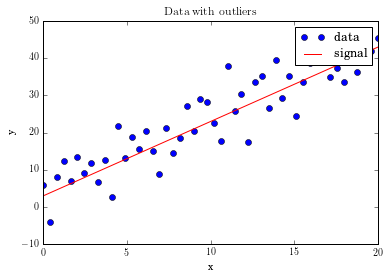

iter=1, x=[0.08273946 1.02087528], f(x)=31904.9395128
point error=1.85075016606e-06, grad error=1.25190270616
number of negative eigenvalues=0
iter=1, x=[0.0827405  1.02086102], f(x)=31904.9412955
point error=1.85565872538e-06, grad error=1.25191209476
number of negative eigenvalues=0
iter=1, x=[2.32281856 1.15810892], f(x)=1586.26009243
point error=2.22044604925e-16, grad error=9.37460121459e-05, iteration=589, f(x)=1310.13822613
Newton parameters = [1.92738482 4.79577834], Levenberg-Marquardt parameters = [1.92738486 4.79577771], Wolfe parameters = [1.92746612 4.79594413]


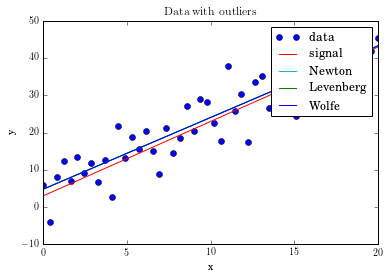

In [28]:
a = 2
b = 3
lin_fun, lin_grad, lin_hessian = mk_lin(a,b)

noise = 5

x_min = 0
x_max = 20
n_data = 50

x_train = np.linspace(x_min, x_max, n_data)
y_train = a * x_train + b + noise * rnd.randn(x_train.size)

plt.plot(x_train, y_train, 'o', label = 'data')
plt.plot(x_train, lin_fun(x_train), 'r-', label = 'signal')
plt.title(r'$\mathrm{Data \ with \ outliers}$')
plt.xlabel('x')
plt.ylabel('y')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.legend()
plt.show()

f, grad, hess = mk_linreg(x_train, y_train)

error_point = 10 ** -10
error_grad = 10 ** -10
h = 10 ** -2
iterations = 1000
x0 = rnd.random(2)

result_newton = newton_descent(f, grad, hess, x0, iterations, error_point, error_grad, h)

result_lm = newton_descent(f, grad, hess, x0, iterations, error_point, error_grad, h, method = 'lm', mu = 0.01)

result_wolfe = steepest_descent_wolfe(f, grad, x0, iterations, error_point, error_grad)

(param_newton, param_lm, param_wolfe) = (result['x_list'][:,-1] for result in (result_newton, result_lm, result_wolfe))
print "Newton parameters = {}, Levenberg-Marquardt parameters = {}, Wolfe parameters = {}".format(param_newton, param_lm, param_wolfe)
newton_lin_fun, newton_lin_grad, newton_lin_hessian = mk_lin(param_newton[0], param_newton[1])
lm_lin_fun, lm_lin_grad, lm_lin_hessian = mk_lin(param_lm[0], param_lm[1])
wolfe_lin_fun, wolfe_lin_grad, wolfe_lin_hessian = mk_lin(param_wolfe[0], param_wolfe[1])

plt.plot(x_train, y_train, 'o', label = 'data')
plt.plot(x_train, lin_fun(x_train), 'r-', label = 'signal')
plt.plot(x_train, newton_lin_fun(x_train), 'c-', label = 'Newton')
plt.plot(x_train, lm_lin_fun(x_train), 'g-', label = 'Levenberg')
plt.plot(x_train, wolfe_lin_fun(x_train), 'b-', label = 'Wolfe')
plt.title(r'$\mathrm{Data \ with \ outliers}$')
plt.xlabel('x')
plt.ylabel('y')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.legend()
plt.show()